In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)

In [4]:
#Loading data
loan = pd.read_csv("/Users/mannam.sriram/Documents/personal/EXPG/EDA/CaseStudy-Lending/loan.csv", low_memory=False)

## Inspecting and understanding the data

In [5]:
# It has 111 columns and half of the columns seems to have null values
loan.shape
loan.head()
loan.info(verbose = True, show_counts = True)

(39717, 111)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [6]:
#Checking how much % of null values exists in each column 
loan.isnull().mean() * 100
#Half of the columns have 100% Null values

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

## Data Cleaning

### Removing null columns

In [7]:
#THis method returns a list containing the columns that have 100% null values
def get_null_columns(df):
    null_columns_mean = df.isnull().mean() * 100
    null_columns = list(null_columns_mean[null_columns_mean == 100].index)
    return null_columns

In [8]:
#number of unique values for each columns
# if a columns has only unique value then we can ignore the columns from the analysis
loan.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [9]:
# This list contains all the columns apart from the null columns retured by the method get_null_columns 
# Each column is is ispected and take a decision whether to keep the columns for the analysis or remove it
# Uncommnted columns are to be ignored from the analysis
columns_to_be_ignored = [
    "id",
      # A unique LC assigned ID for the loan listing.
      # since it is an identifier we can ignore this column
    
    "member_id",
      # A unique LC assigned Id for the borrower member.
      # since it is an identifier we can ignore this column, duplicate to id
    
    #"loan_amnt", # numerical
      # The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    
    "funded_amnt", # numerical
      # The total amount committed to that loan at that point in time.
    
    "funded_amnt_inv", # numerical
      # The total amount committed by investors for that loan at that point in time.
      # loan_amt, funded_amt and funded_amnt_inv are similar so we can keep funded_amnt
    
    #"term", - # categorical - need data type correction
      # The number of payments on the loan. Values are in months and can be either 36 or 60.
    
    #"int_rate", #- numerical/categorical - needs correction
      # Interest Rate on the loan
    
    "installment",
      # The monthly payment owed by the borrower if the loan originates.
      # since EMI is correlated to the loan amount and int_rate we can ignore the columns
    
    #"grade",
      # LC assigned loan grade
    
    "sub_grade",
      # LC assigned loan subgrade
      # grade and sub grade are correlated so we can keep grade and remove sub_grade
    
    "emp_title",
      # The job title supplied by the Borrower when applying for the loan.
      # since the grade is there we can remove it
    
    #"emp_length", categorical, needs correction
      # Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
    
    #"home_ownership", - categorical
      # The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
    
    #"annual_inc", # numerical
    
    #"verification_status", # categorical
    
    #"issue_d",
      # The month which the loan was funded
    
    #"loan_status", # categorical
    
    "pymnt_plan",
      # Indicates if a payment plan has been put in place for the loan
      #  there is only value which is 'n' so can be ignored
    
    "url",
      # URL for the LC page with listing data.
    
    "desc",
      # Loan description provided by the borrower
    
    #"purpose",
      # A category provided by the borrower for the loan request. 
    
    "title",
      # The loan title provided by the borrower
      # since the purpose as a category available we can ignore title
    
    "zip_code",
      # values are like 917xx, can be ignored as addr_state is there
    
    #"addr_state", - categorical
    
    # "dti", # numerical - debt to income ratio
      # A ratio calculated using the borrower’s total monthly debt payments on the 
      # total debt obligations, excluding mortgage and the requested LC loan, 
      # divided by the borrower’s self-reported monthly income.
    
    #"delinq_2yrs", # categorical
      # The number of 30+ days past-due incidences of delinquency in the 
      # borrower's credit file for the past 2 years
    
    "earliest_cr_line",
      # The month the borrower's earliest reported credit line was opened
    
    # "inq_last_6mths", # categorical
      # The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
    
    # "mths_since_last_delinq", #numerical
      # The number of months since the borrower's last delinquency.
    
    # "mths_since_last_record", # numerical
      # The number of months since the last public record.
    
    # "open_acc", # numerical
      # The number of open credit lines in the borrower's credit file.
    
    # "pub_rec", # categorical
      # Number of 
    
     "revol_bal",
      # Total credit revolving balance
      # revol_util is already there so we can delete it
    
    #"revol_util", # numerical
      # Revolving line utilization rate, or the amount of credit the borrower is 
      # using relative to all available revolving credit.
    
    "total_acc",
      # The total number of credit lines currently in the borrower's credit file
      # total_acc and open_acc are related..open_acc is open and total is all lines
      # since we already have open_acc we can ignore this column
    
    "initial_list_status",  # categorical
      # The initial listing status of the loan. Possible values are – W, F
      # all values are F so we can ignore this
    
    "out_prncp",
      # Remaining outstanding principal for total amount funded
      # valid only for current loans
    
    "out_prncp_inv",
      # Remaining outstanding principal for portion of total amount funded by investors
      # valid only for current loans
    
    "total_pymnt",
      # Payments received to date for total amount funded
    
    "total_pymnt_inv",
      # Payments received to date for portion of total amount funded by investors
    
    "total_rec_prncp",
      # Principal received to date
    
    "total_rec_int",
      # Interest received to date
    
    "total_rec_late_fee",
      # Late fees received to date
    
    "recoveries",
      # post charge off gross recovery
      # valid only for charged off and after the loan is defaulted so can be ignored
    
    "collection_recovery_fee",
      # post charge off collection fee
      # valid only for charged off and after the loan is defaulted so can be ignored
    
    "last_pymnt_d", 
      # Last month payment was received
      # can be ignored
    
    "last_pymnt_amnt",
      # Last total payment amount received
      # can be ignored
    
    "next_pymnt_d",
      # can be ignored
    
    "last_credit_pull_d",
      # The most recent month LC pulled credit for this loan
    
    "collections_12_mths_ex_med",
      # Number of collections in 12 months excluding medical collections
      # 0 and NA can be removed
    
    "policy_code",
       # only value is 1 can be ignored
    
    "application_type",
      # all values are INDIVIDUAL so can be ignored
    
    "acc_now_delinq",
      #The number of accounts on which the borrower is now delinquent."
      # all values are 0
    
    "chargeoff_within_12_mths",
      # Number of charge-offs within 12 months"
      # all are 0 can be ignored
    
    "delinq_amnt",
      #The past-due amount owed for the accounts on which the borrower is now delinquent."
      # all are 0 so can be removed
    
    #"pub_rec_bankruptcies" #categorical
      #Number of public record bankruptcies"
    
    "tax_liens"
      #Number of tax liens"
      # all are 0 or NA
]

#### Removing columns that are not needed for the analysis

In [10]:
# take a copy of the data frame so that all the analysis can be performed on the new df and keeping the 
# original df intact
loan_copy = pd.DataFrame(loan)

removable_columns = []

# There are many null columns with all values as null which can be deleted from the analysis 
null_columns = get_null_columns(loan_copy)
removable_columns.extend(null_columns)
removable_columns.extend(columns_to_be_ignored)
print(f'all columns which can be removed {removable_columns}')

all columns which can be removed ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_

In [11]:
#Remove columns that are not needed for analysis
loan_copy.drop(columns = removable_columns, inplace = True)

In [12]:
loan_copy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   term                    39717 non-null  object 
 2   int_rate                39717 non-null  object 
 3   grade                   39717 non-null  object 
 4   emp_length              38642 non-null  object 
 5   home_ownership          39717 non-null  object 
 6   annual_inc              39717 non-null  float64
 7   verification_status     39717 non-null  object 
 8   issue_d                 39717 non-null  object 
 9   loan_status             39717 non-null  object 
 10  purpose                 39717 non-null  object 
 11  addr_state              39717 non-null  object 
 12  dti                     39717 non-null  float64
 13  delinq_2yrs             39717 non-null  int64  
 14  inq_last_6mths          39717 non-null

In [13]:
#Describe the data fram to see if the columns are having the proper data types
loan_copy.describe()

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,pub_rec_bankruptcies
count,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,0.043260
std,7456.670694,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,0.204324
min,500.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,0.000000
50%,10000.000000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,0.000000
75%,15000.000000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,0.000000
max,35000.000000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,2.000000


#### When comparing against all the columns we cna see that term, int_rate, grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state are missing from the describe they can be catagorical lets ispect those columns to confirm the same

In [14]:
loan_copy[["term", "int_rate", "issue_d", "grade", "emp_length", "home_ownership", "verification_status", "loan_status", "purpose", "addr_state"]].head()


,term,int_rate,issue_d,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state
0,36 months,10.65%,Dec-11,B,10+ years,RENT,Verified,Fully Paid,credit_card,AZ
1,60 months,15.27%,Dec-11,C,< 1 year,RENT,Source Verified,Charged Off,car,GA
2,36 months,15.96%,Dec-11,C,10+ years,RENT,Not Verified,Fully Paid,small_business,IL
3,36 months,13.49%,Dec-11,C,10+ years,RENT,Source Verified,Fully Paid,other,CA
4,60 months,12.69%,Dec-11,B,1 year,RENT,Source Verified,Current,other,OR


#### we can see that int_rate, emp_length though they are numeric they are being treated as strings
#### issue_d is a date but not in date format
#### term also we can make clean it
#### other columns seems to be catagorical

### Standardize columns
#### Columns that need to be standarized
#### term , int_rate, emp_length, issue_d

In [15]:
def standardize_term(x):
    x = x.strip()
    return int(x.split(" ")[0])

def standardize_int_rate(x):
    return float(x[0:-1])

def standardize_emp_length(x):
    if (x == "< 1 year"):
        return 0
    elif (x == "10+ years"):
        return 10
    elif pd.isnull(x):
        return x
    else:
        return int(x.split(' ')[0])

def standardize_revol_util(x):
    if pd.isnull(x):
        return x
    else:
        return float(x[0:-1])

In [16]:
#Standardize emp_length
loan_copy.emp_length = loan_copy.emp_length.apply(standardize_emp_length)

# Standardize term
loan_copy.term = loan_copy.term.apply(standardize_term)

# Standardize int_rate
loan_copy.int_rate = loan_copy.int_rate.apply(standardize_int_rate)

# Standardize revol_util
loan_copy.revol_util = loan_copy.revol_util.apply(standardize_revol_util)

# Standardize issue_d and derive new columns issue_year and issue_month
loan_copy['issue_year'] = loan_copy['issue_d'].apply(lambda x: "20"+x.split("-")[1])
loan_copy["issue_month"] = loan_copy['issue_d'].apply(lambda x: x.split("-")[0])

loan_copy.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,issue_year,issue_month
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,...,0,1,NaN,NaN,3,0,83.7,0.0,2011,Dec
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,0,5,NaN,NaN,3,0,9.4,0.0,2011,Dec
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,0,2,NaN,NaN,2,0,98.5,0.0,2011,Dec
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,0,1,35.0,NaN,10,0,21.0,0.0,2011,Dec
4,3000,60,12.69,B,1.0,RENT,80000.0,Source Verified,Dec-11,Current,...,0,0,38.0,NaN,15,0,53.9,0.0,2011,Dec


In [17]:
loan_copy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   term                    39717 non-null  int64  
 2   int_rate                39717 non-null  float64
 3   grade                   39717 non-null  object 
 4   emp_length              38642 non-null  float64
 5   home_ownership          39717 non-null  object 
 6   annual_inc              39717 non-null  float64
 7   verification_status     39717 non-null  object 
 8   issue_d                 39717 non-null  object 
 9   loan_status             39717 non-null  object 
 10  purpose                 39717 non-null  object 
 11  addr_state              39717 non-null  object 
 12  dti                     39717 non-null  float64
 13  delinq_2yrs             39717 non-null  int64  
 14  inq_last_6mths          39717 non-null

### Now all columns are in proper data types, lets divide each columns into numerical and catagorical to make analysis easy

In [18]:
### Get the list of categorical and numerical columns
catagorical_columns = [
    "term", 
    "grade", 
    "emp_length", 
    "home_ownership", 
    "verification_status", 
    "purpose", 
    "addr_state",
    "delinq_2yrs",
    "inq_last_6mths",
    "pub_rec",
    "loan_status",
    "pub_rec_bankruptcies",
    "issue_year",
    "issue_month"
    ]

numerical_columns = [
    "loan_amnt", 
    "int_rate", 
    "annual_inc", 
    "dti", 
    "mths_since_last_delinq", 
    "mths_since_last_record", 
    "open_acc", 
    "revol_util", 
  ] 

## Univariate analysis

### Numerical columns - 
  #### For numerica columns draw box plot and see if there  are any outliers

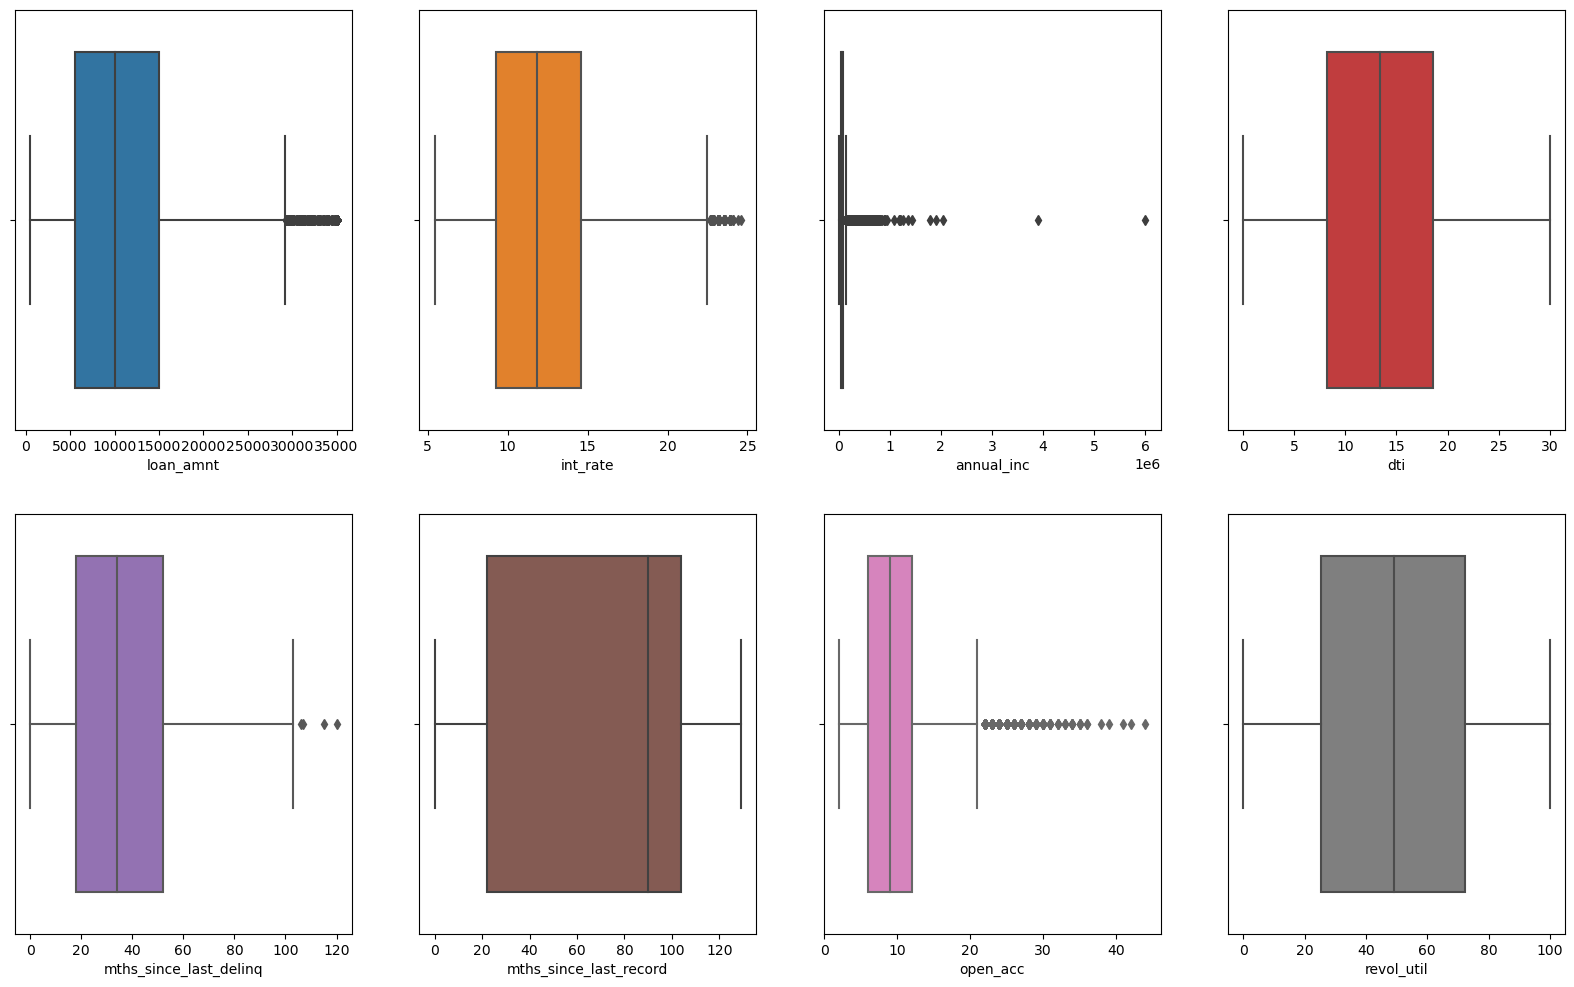

In [19]:
#Do boxplot and see if there are outliers
fig = plt.figure(figsize=(20, 12))
num_rows = 2
num_cols = 4

position = 1
colors = plt.rcParams["axes.prop_cycle"]()

for col in numerical_columns:
    fig.add_subplot(num_rows, num_cols, position)
    position = position + 1    
    c = next(colors)["color"]
    sns.boxplot(x = loan_copy[col], color = c)
    
plt.show();

#### we can clearly see that annual_inc seems to have a lot of ouliers,it is better to remove the outlier
#### Ispect annual_inc column

In [20]:
loan_copy.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### There is a a lot of difference between 75th quartile and the maximum value, 
#### lets inpect at different quartiles from 75th quartile to max

In [21]:
loan_copy['annual_inc'].quantile(0.8)
loan_copy['annual_inc'].quantile(0.9)
loan_copy['annual_inc'].quantile(0.95)
loan_copy['annual_inc'].quantile(0.99)

90000.0

116000.0

142000.0

234999.36

<Axes: xlabel='annual_inc'>

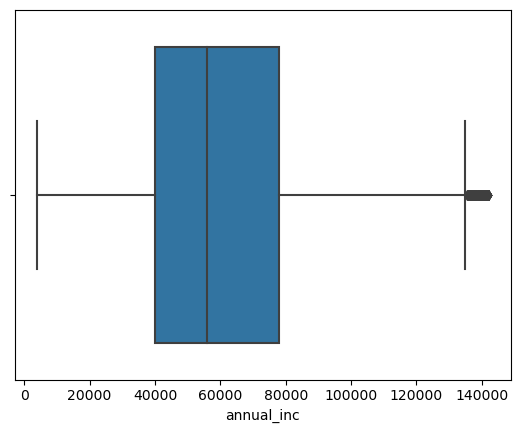

In [22]:
#### based on the above output we can remove the columns beyond 95th quartile
loan_copy = loan_copy[loan_copy.annual_inc <= loan_copy.annual_inc.quantile(0.95)]

#Do boxplot and check once again
sns.boxplot(x = loan_copy.annual_inc)

#### other thing is, annual_inc is a numerical value to get better insights and comparing against the 
#### other columns we can make it as a catagorical coulmn by dividing it into multiple buckets

In [23]:
pd.cut(loan_copy['annual_inc'], bins=5).unique()

[(3862.0, 31600.0], (31600.0, 59200.0], (59200.0, 86800.0], (86800.0, 114400.0], (114400.0, 142000.0]]
Categories (5, interval[float64, right]): [(3862.0, 31600.0] < (31600.0, 59200.0] < (59200.0, 86800.0] < (86800.0, 114400.0] < (114400.0, 142000.0]]

In [24]:
pd.cut(loan_copy['int_rate'], bins=5).unique()

[(9.216, 13.012], (13.012, 16.808], (5.401, 9.216], (16.808, 20.604], (20.604, 24.4]]
Categories (5, interval[float64, right]): [(5.401, 9.216] < (9.216, 13.012] < (13.012, 16.808] < (16.808, 20.604] < (20.604, 24.4]]

In [25]:
loan_copy['annual_inc_groups'] = pd.cut(loan_copy['annual_inc'], bins=5,precision =0,labels =['3k-27k','27k-50k','50k-72k','72k-95k','95k-118k'])
catagorical_columns.append("annual_inc_groups")

# We can do the same thing with int_rate as well, we can create multiple int_rate groups
loan_copy['int_rate_groups'] = pd.cut(loan_copy['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
catagorical_columns.append("int_rate_groups")

loan_copy.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,pub_rec_bankruptcies,issue_year,issue_month,annual_inc_groups,int_rate_groups
0,5000,36,10.65,B,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,...,NaN,NaN,3,0,83.7,0.0,2011,Dec,3k-27k,9%-13%
1,2500,60,15.27,C,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,...,NaN,NaN,3,0,9.4,0.0,2011,Dec,3k-27k,13%-17%
2,2400,36,15.96,C,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,...,NaN,NaN,2,0,98.5,0.0,2011,Dec,3k-27k,13%-17%
3,10000,36,13.49,C,10.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,...,35.0,NaN,10,0,21.0,0.0,2011,Dec,27k-50k,13%-17%
4,3000,60,12.69,B,1.0,RENT,80000.0,Source Verified,Dec-11,Current,...,38.0,NaN,15,0,53.9,0.0,2011,Dec,50k-72k,9%-13%


## Lets plot histogram on numerical columns and see how each column has the data

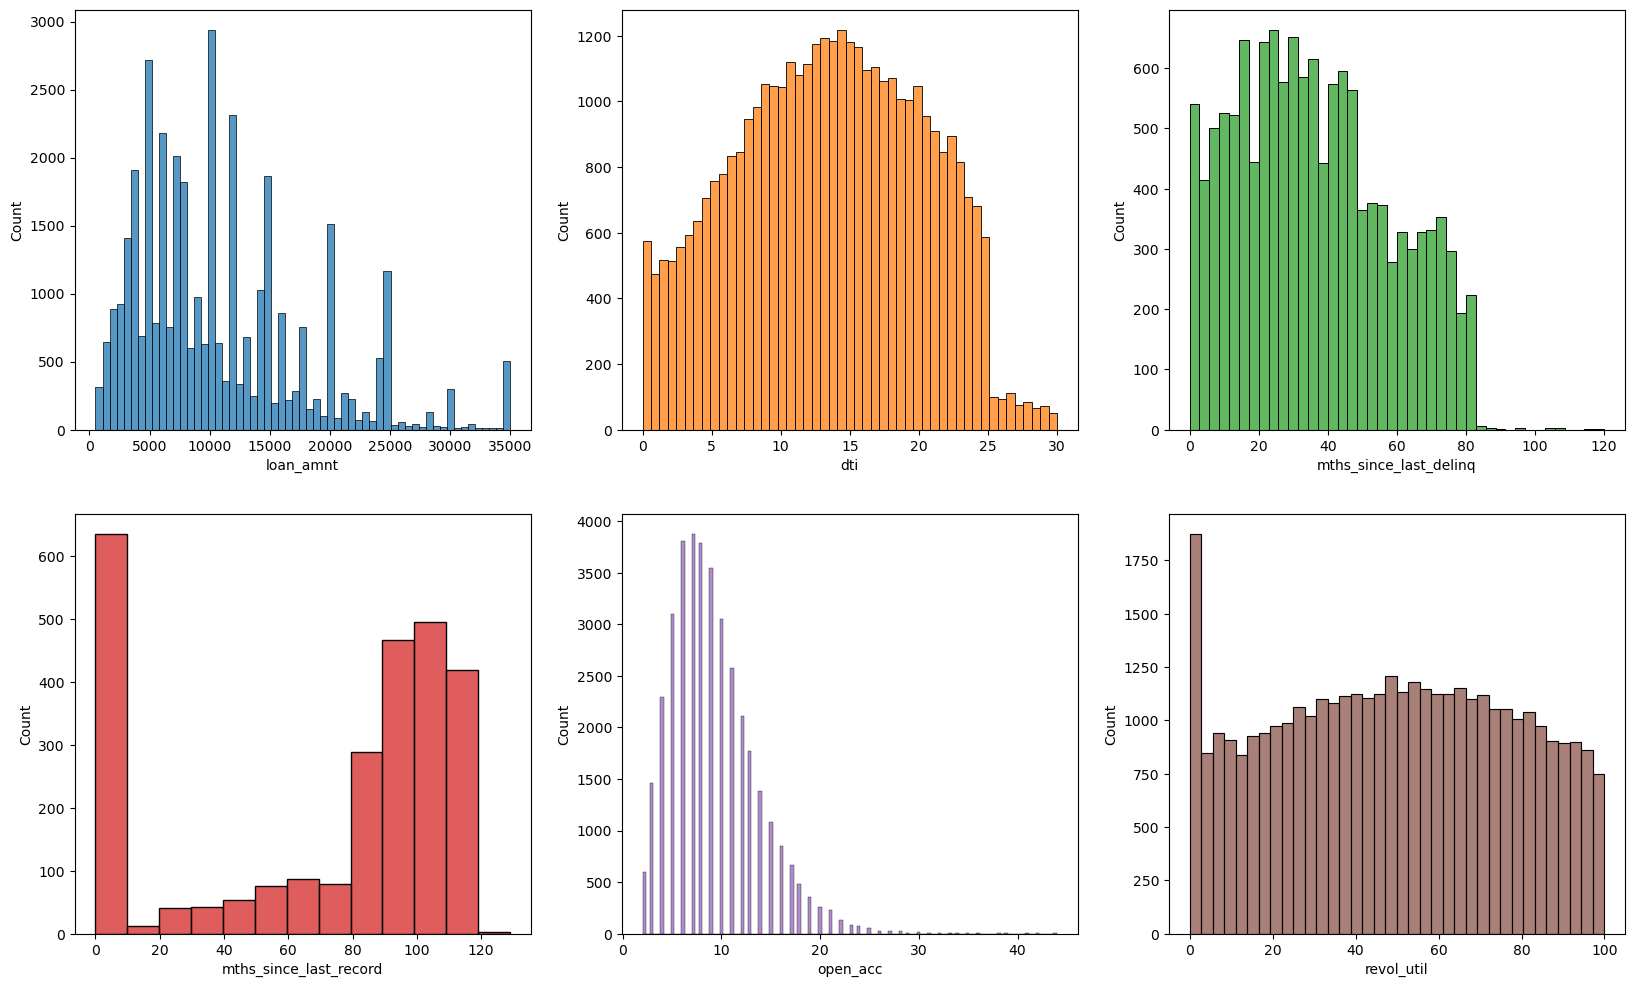

In [26]:
#histogram
fig = plt.figure(figsize=(20, 12))
num_rows = 2
num_cols = 3

position = 1
colors = plt.rcParams["axes.prop_cycle"]()

for col in numerical_columns:
    if col in ["int_rate", "annual_inc"]:
        continue
    fig.add_subplot(num_rows, num_cols, position)
    position = position + 1    
    c = next(colors)["color"]
    sns.histplot(x = loan_copy[col], color = c)
    
plt.show();

## Observarions on numerical colums

#### most of the users have taken loan_amnt is around 10000
#### debt to income ration is is 15% for most of the applicatns
#### majority of the applicants have similar revolv_util

## Univariate analysis on Categorical columns

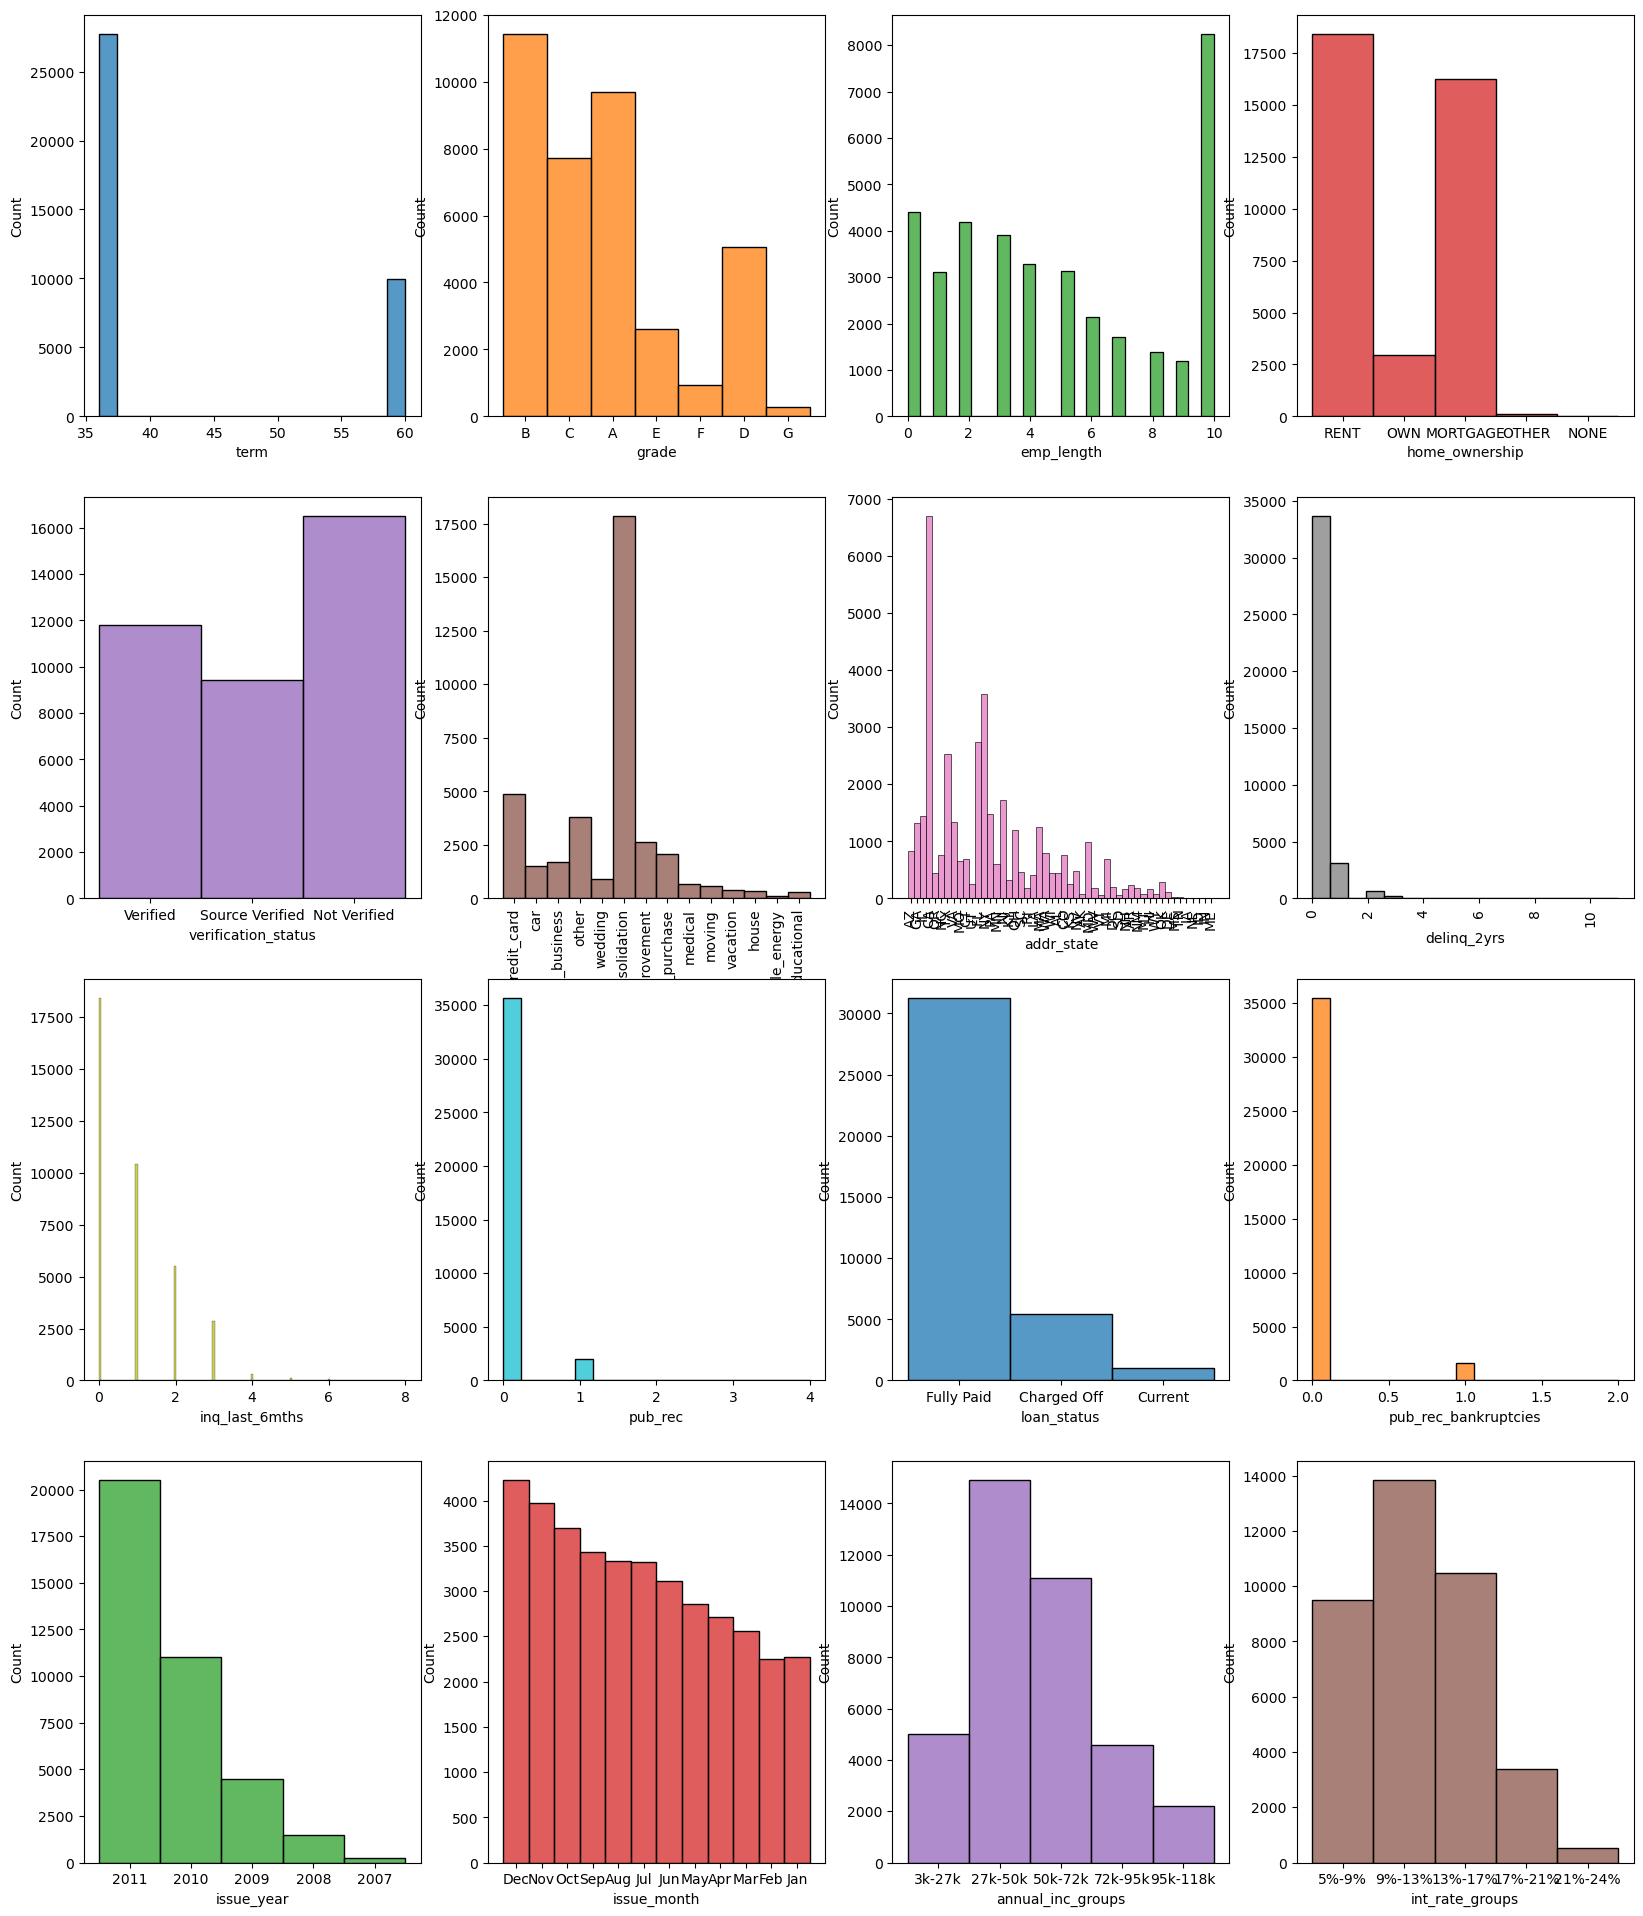

In [28]:
#histogram for entire data catagorical columns
fig = plt.figure(figsize=(20, 24))
num_rows = 4
num_cols = 4

position = 1
colors = plt.rcParams["axes.prop_cycle"]()

for col in catagorical_columns:
    fig.add_subplot(num_rows, num_cols, position)
    position = position + 1    
    c = next(colors)["color"]
    
    if (col in ["purpose", "delinq_2yrs", "addr_state"]):
        plt.xticks(rotation=90)
    
    sns.histplot(x = loan_copy[col], color = c)
    
plt.show();

### Observations on catagorical columns
-  Majority of the applicants has opted for 36 months loan tenure
-  Grade B and A has taken the loans/got the loans most respectively
-  Employees having 10+ years of expierence has taken/got the loan the most
-  Majority of the loan applicants are having Rented or mortage house
-  Majority of the applicants verifications status is not verified which can cause a customer to be defaulted because there was no verification done whethere an applicant can repay the loan, his income source, etc...
-  Majority of the applicants have taken the loan for debt consolidation, credit card 
-  State NY is highest compared to the other states in taking loans
-  10-14% of the applicants are defaulted
-  Some of the customers are having public record of bankupties they may be defaulted 
-  More loans are issued in the year 2011 and in the month Dec
-  Majority of the applicants are in 58k-85k income group
-  Majority of the applicants are getting 9-13% interest rates

## Segmented univariate analysis on numerical columns

#### since loan_status is Charged Off, Fully Paid and Current, separate the data into these categories and plot the graphs 
#### we can ignore the current 

In [29]:
loan_status = list(loan_copy.loan_status.unique())
loan_status_df = []

for status in loan_status:
    if(status == "Current"):
        continue
        
    loan_status_df.append(loan_copy[loan_copy.loan_status == status])
    
len(loan_status_df)

2

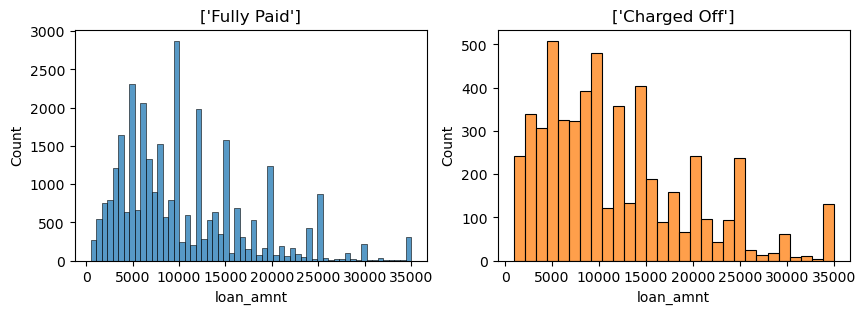

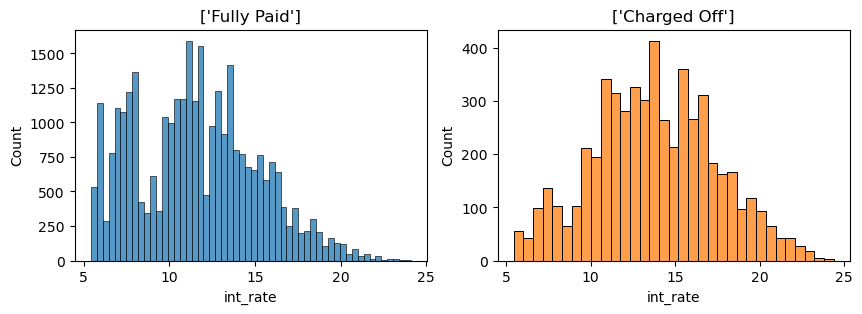

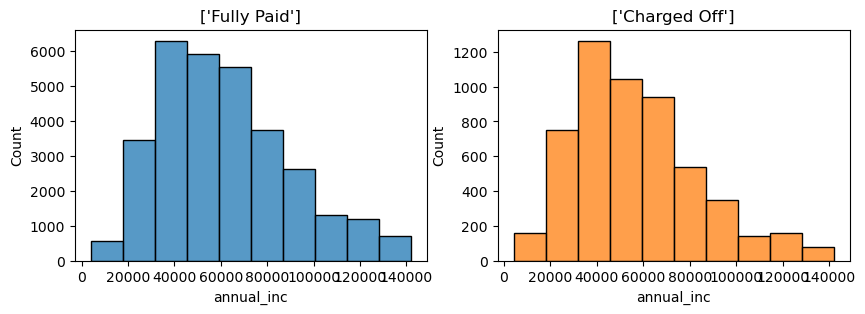

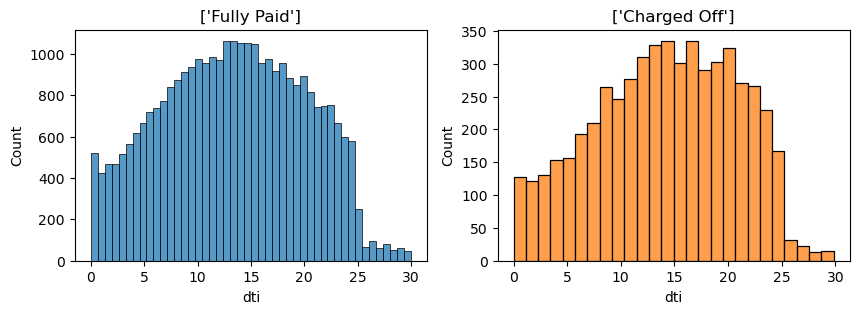

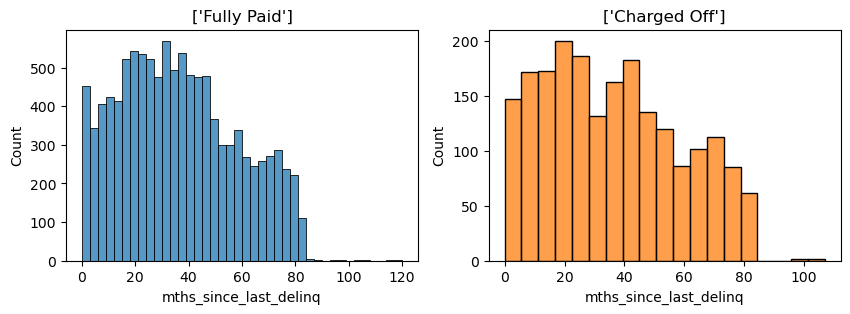

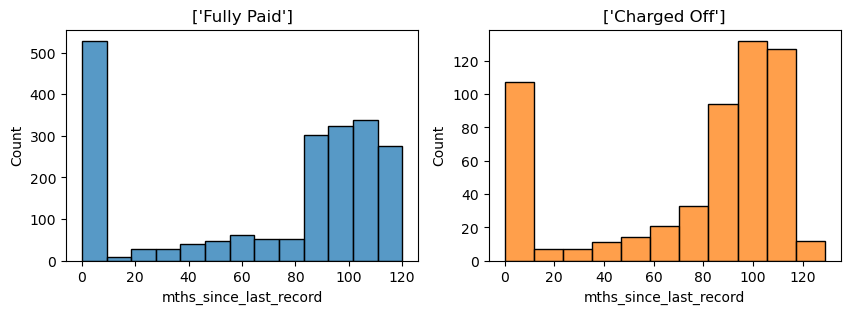

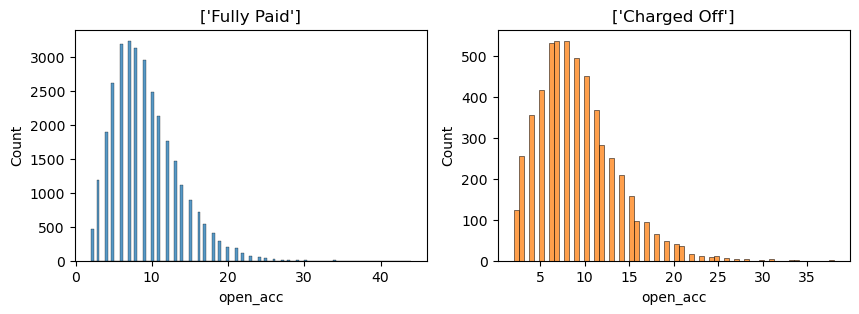

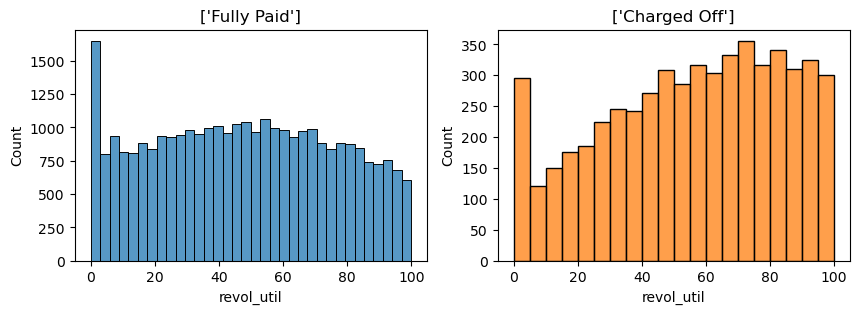

In [30]:
#histogram
for col in numerical_columns:
    fig = plt.figure(figsize=(10, 3))
    num_rows = 1
    num_cols = 2

    position = 1
    colors = plt.rcParams["axes.prop_cycle"]()
    for df in loan_status_df:
        fig.add_subplot(num_rows, num_cols, position)
        position = position + 1    
        c = next(colors)["color"]
        if(col == "annual_inc") :
            num_bins = 10
        else:
            num_bins = "auto"

        sns.histplot(x = df[col], bins = num_bins, color = c). set(title= df.loan_status.unique())

plt.show();

### segmented univariate analysis using boxplot

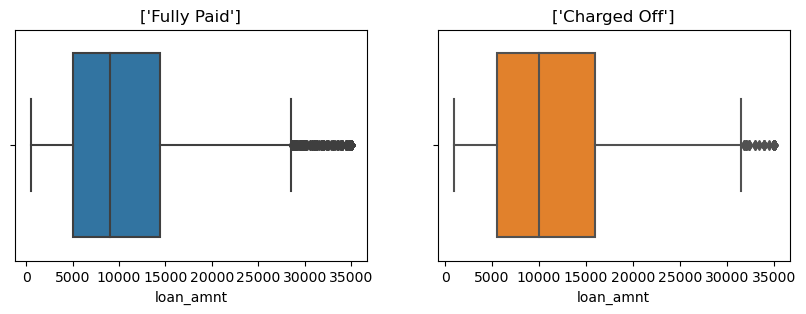

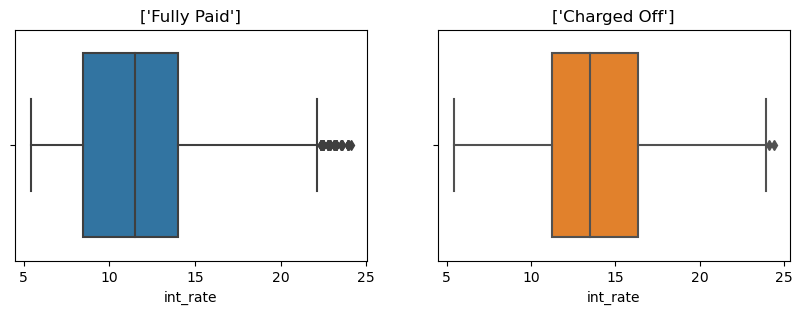

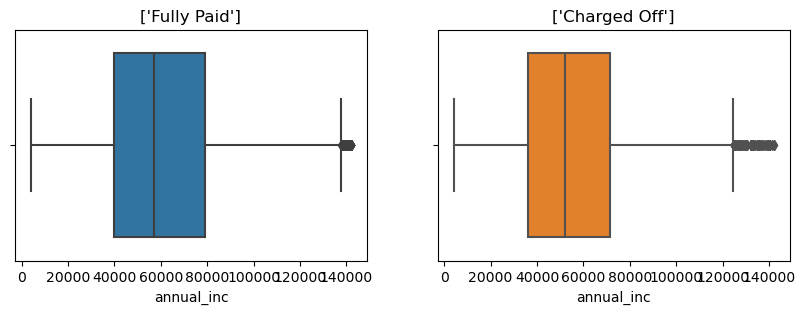

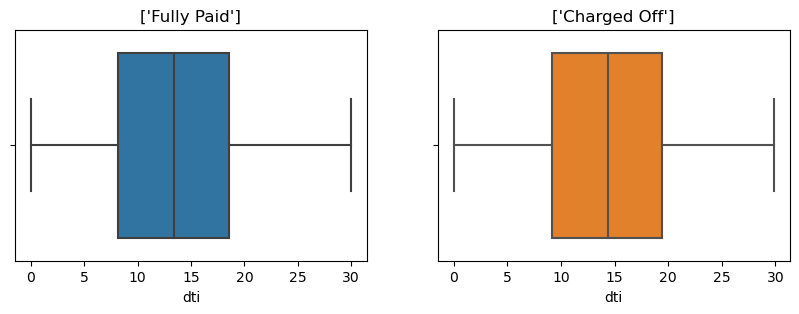

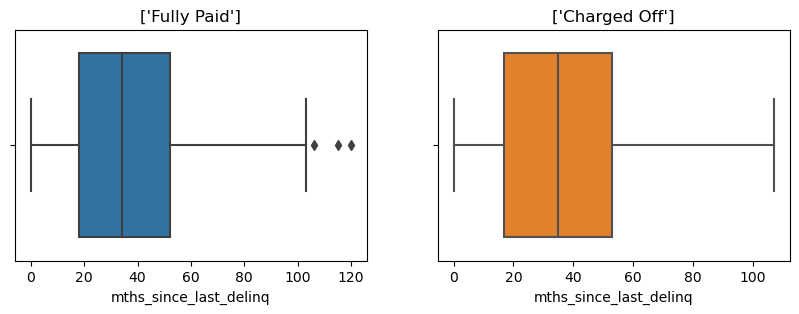

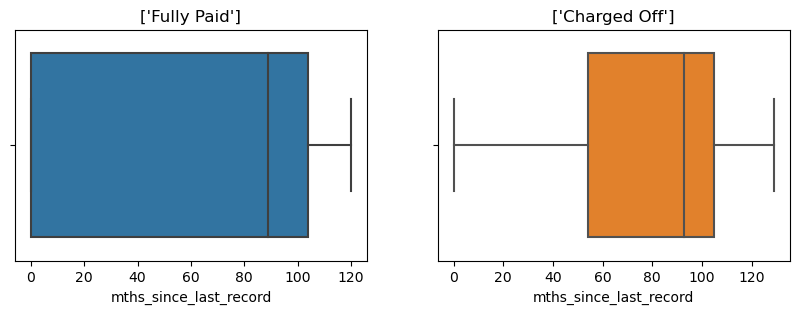

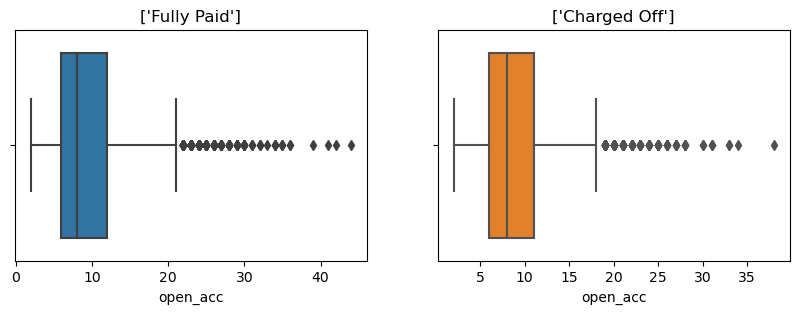

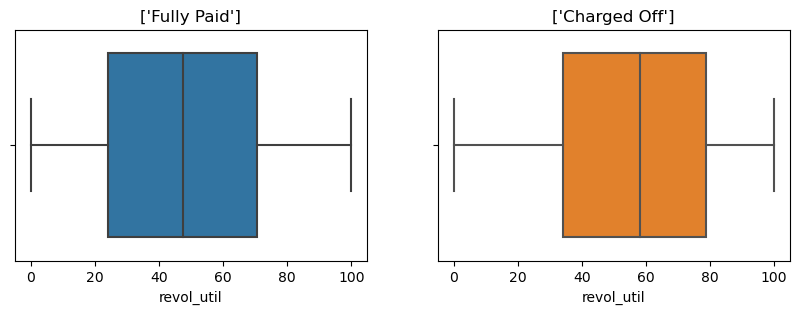

In [31]:
#Box plot for numerical columns
for col in numerical_columns:
    fig = plt.figure(figsize=(10, 3))
    num_rows = 1
    num_cols = 2

    position = 1
    colors = plt.rcParams["axes.prop_cycle"]()
    for df in loan_status_df:
        fig.add_subplot(num_rows, num_cols, position)
        position = position + 1    
        c = next(colors)["color"]
        sns.boxplot(x = df[col], color = c). set(title= df.loan_status.unique())

plt.show();

### Observations from Segmented univariate analysis on Numerical columns for Loan status Fully paid and Charged Off
-  Charged off people seems to have higher revolving utilization arounf 35-80% where as for fully paid it is at 22-70%
-  Interest rates are in the range of 8-14% for Fully Paid, defaulter have 11-17%, looks like they are being charged with higher interest rates compared to full paid it may be one of the reason for getting defaulted
-  debt to income ratio is higher for charged off peeople
-  On average charged-off people has taken higher loan compared to fully paid people

### Segmented univariate analysis on categorical columns
#### since loan_status is Charged Off, Fully Paid and Current, separate the data into these categories and plot the graphs

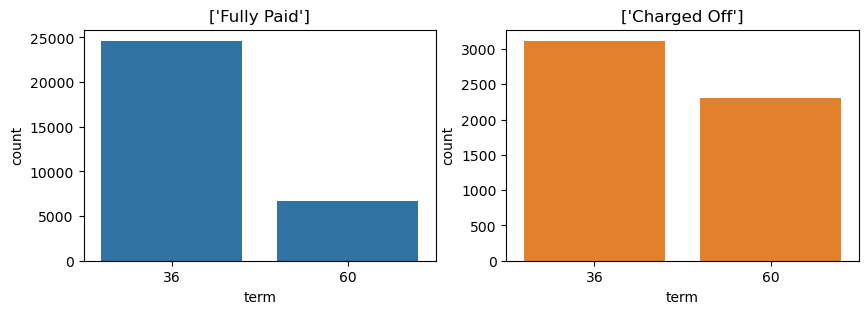

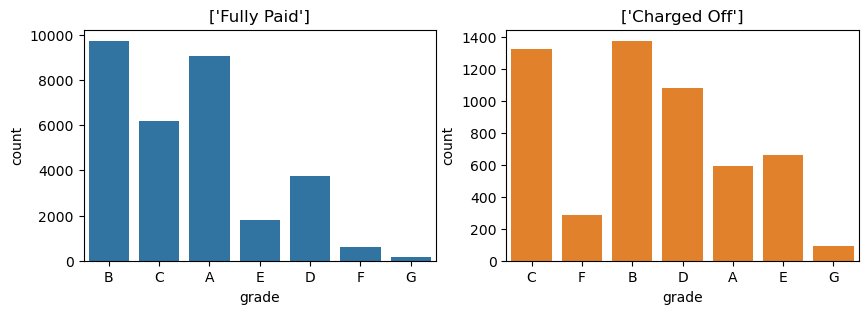

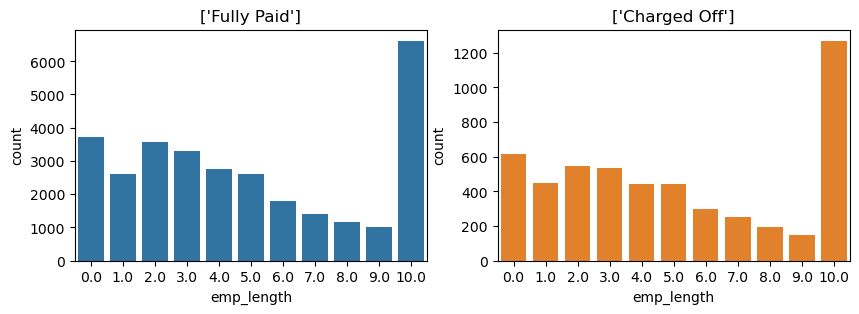

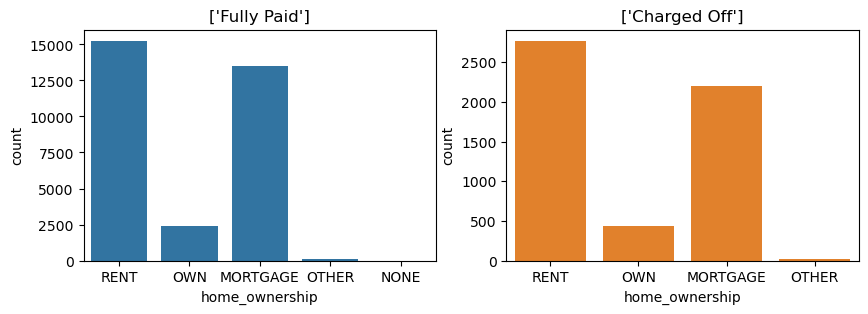

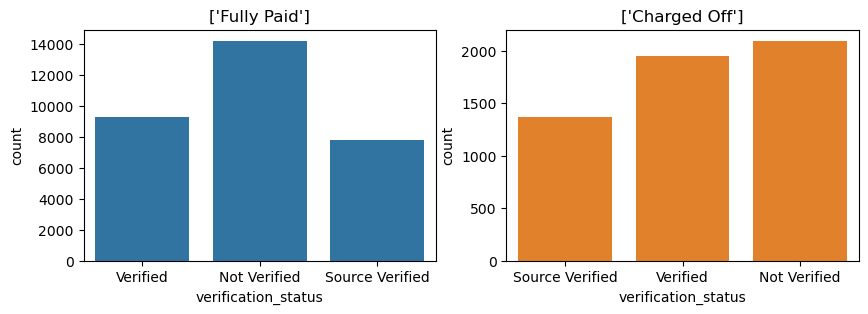

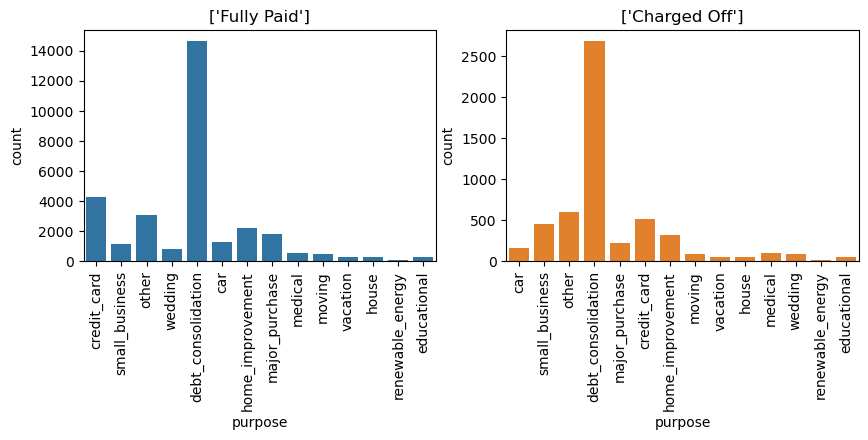

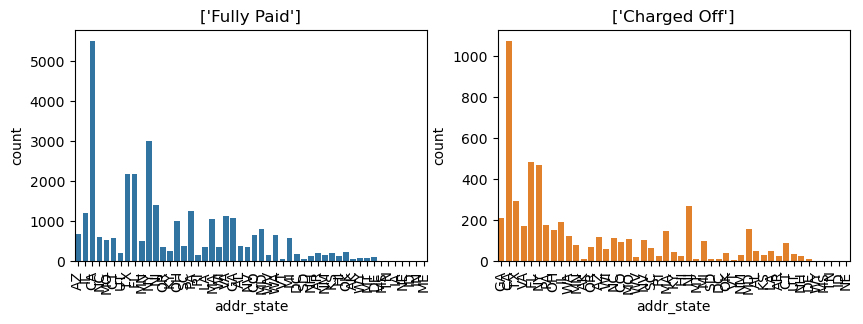

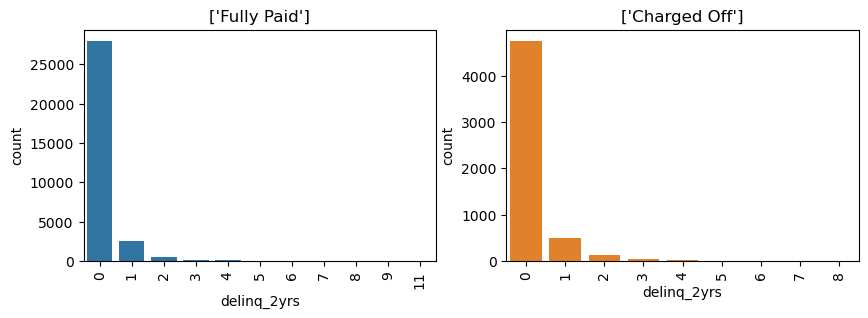

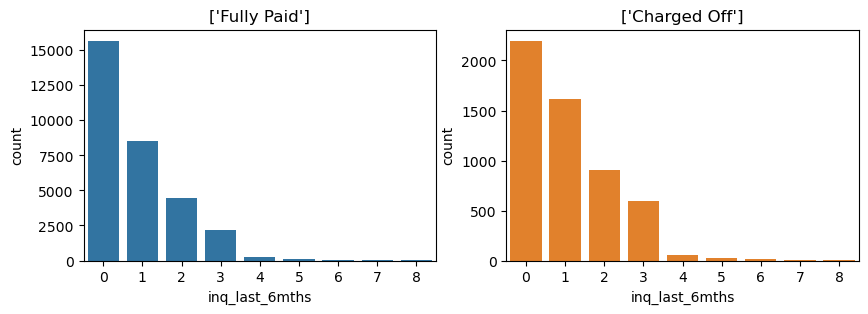

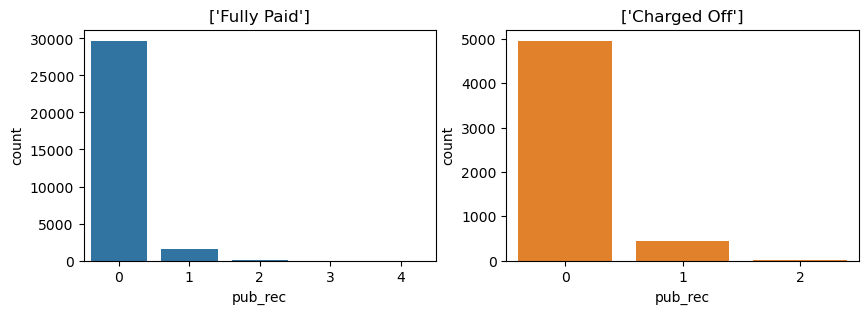

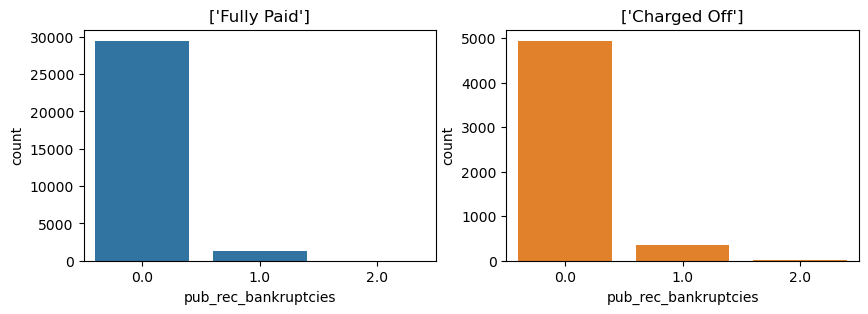

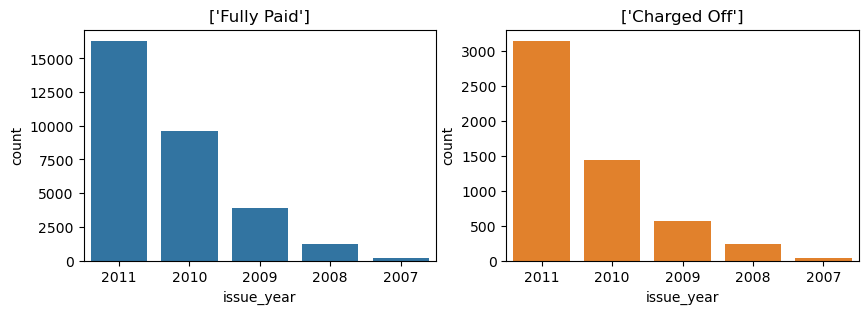

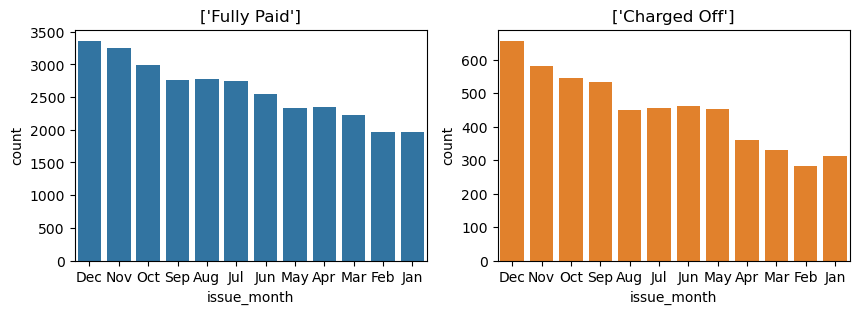

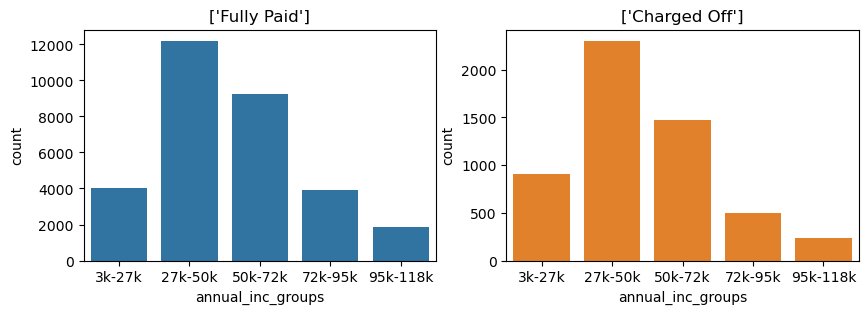

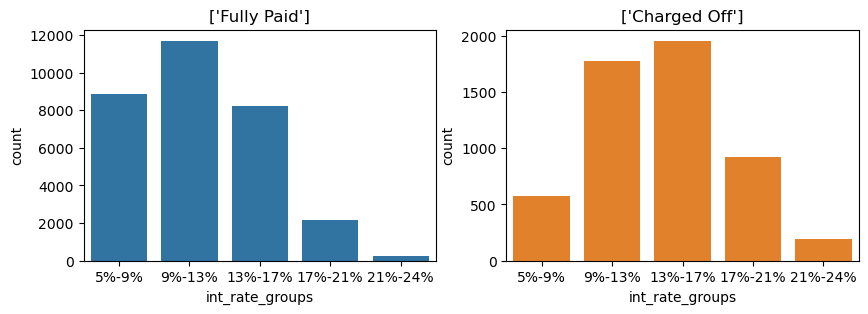

In [32]:
#Box plot for numerical columns
for col in catagorical_columns:
    if(col == "loan_status"):
        continue
    
    fig = plt.figure(figsize=(10, 3))
    num_rows = 1
    num_cols = 2

    position = 1
    colors = plt.rcParams["axes.prop_cycle"]()
    for df in loan_status_df:
        fig.add_subplot(num_rows, num_cols, position)
        position = position + 1    
        c = next(colors)["color"]
        if (col in ["purpose", "delinq_2yrs", "addr_state"]):
            plt.xticks(rotation=90)

        sns.countplot(x = df[col], color = c). set(title= df.loan_status.unique())

plt.show();

### Observations from Segmented univariate analysis on Numerical columns for Loan status Fully paid and Charged Off
-  Charged off applicants are opting for 60months more compared the applicants
-  Grade B and C applicats are defulting more.
-  applicaants whose verifications staus is not verifed are getting defaulted more.
-  debt consolidation, other purpose, small business purpose are defaulting most
-  More defaulters are found in 2011 and December month has the highest default count compared to the other months
-  income group 27k -72k has more chances of getting defaulted
-  intereset rate 13-17% has the highest default rate

## Bivariate analysis
#### our target variable is loan_status and we want to how other columns are affecting the loan_status. so we will try to do bivariate analysis for loan_status and the other columns

#### numerical vs categoical

## loan_status vs other columns

['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_util']


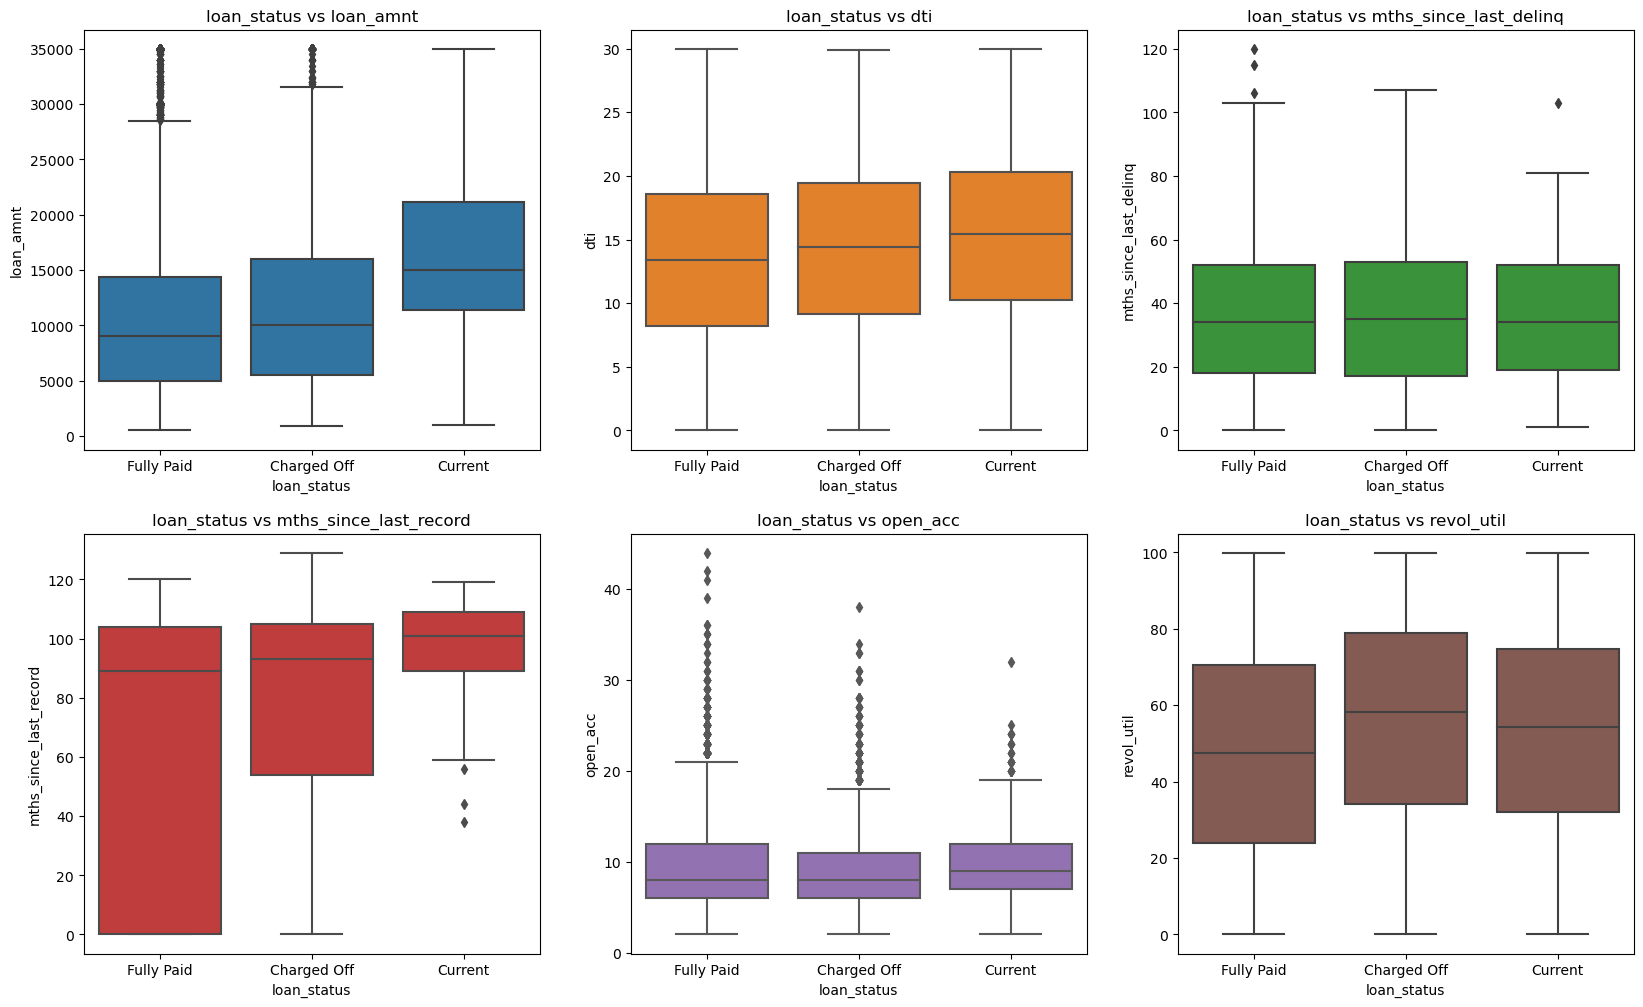

In [33]:
###loan_status vs numerical columns
fig = plt.figure(figsize=(20, 12))
num_rows = 2
num_cols = 3

position = 1
colors = plt.rcParams["axes.prop_cycle"]()
print(numerical_columns)
    
for num_col in numerical_columns:
    if(num_col in ["annual_inc", "int_rate"]):
        continue
     
    fig.add_subplot(num_rows, num_cols, position)
    position = position + 1    
    c = next(colors)["color"]
    sns.boxplot(x = loan_copy.loan_status, y = loan_copy[num_col], color = c).set(title = f"loan_status vs {num_col}")
    
plt.show();

## Obserbvations from Bivariate analysis of loan_status vs other columns
-  charged off people took more loan compared fully paid
-  charged off people have slightly higher debt to income ratio
-  revov utilization is higher for charged off people compared to fully paid

## bivariate analysis on loan_status vs categorical columns

In [ ]:
###loan_status vs catagorical columns
fig = plt.figure(figsize=(20, 12))
num_rows = 4
num_cols = 4

position = 1
colors = plt.rcParams["axes.prop_cycle"]()
print(catagorical_columns)
    
for x_col in catagorical_columns:
    #for y_col in catagorical_columns:
        if(x_col in ["loan_status"] or y_col in ["loan_status"]):
            continue

        fig.add_subplot(num_rows, num_cols, position)
        position = position + 1    
        c = next(colors)["color"]
        sns.barplot(data = loan_copy, y = y_col, x = x_col, hue = "loan_status", color = c).set(title = f"loan_status vs {num_col}")
    
plt.show();

In [ ]:
####loan_status vs catagorical columns
for cat_col in catagorical_columns:
    print(cat_col)
    sns.catplot(x = loan_copy.loan_status, y = loan_copy[cat_col], kind="bar")
    plt.show()


In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "loan_amnt", x = "emp_length", hue = "loan_status")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "funded_amnt", x = "grade", hue = "loan_status")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "loan_amnt", x = "purpose", hue = "loan_status")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "loan_amnt", x = "home_ownership", hue = "loan_status")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "loan_amnt", x = "int_rate_groups", hue = "loan_status")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "loan_amnt", x = "annual_inc_groups", hue = "loan_status")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "annual_inc", x = "purpose", hue = "loan_status")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data = loan_no_current, y = "funded_amnt", x = "verification_status", hue = "loan_status")
plt.xticks(rotation=90)
plt.show()